# Python 與機器學習 - 迴歸問題

## 郭耀仁

## 迴歸問題有哪些？

- 利用月收入來核定信用卡額度
- 利用坪數、房間數來預測房價
- 利用每日最高氣溫來預測飲料店的冰紅茶銷量
- ...etc.

## 迴歸問題

- 假設
- 成本函數
- 梯度遞減

## 迴歸問題（2）

- 假設

> 真實的函數是：$y = f(x)$，在不知道真實函數的情況下，透過訓練資料與演算法而產生的假設是$\hat{y} = h(x)$

## 迴歸問題（3）

- 成本函數（Cost Function）

> 當 $\hat{y}$ 與 $y$ 之間的差異愈小，我們就可以更有自信地說假設跟真實的函數愈相似。

- 常見的成本函數是 MSE（Mean Squared Error）

$$minimize: \frac{1}{2m}\sum_{i=1}^{m}(\hat{y_i}-y_i)^2$$

## 迴歸問題（4）

- 成本函數
    - 如果一個真實的函數是 $y = f(x) = x$

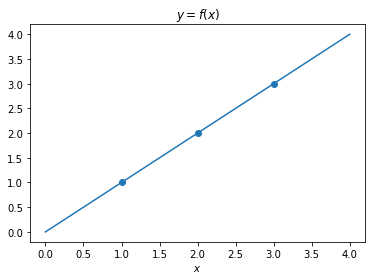

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5)
y = x
plt.scatter(x[1:4], y[1:4])
plt.plot(x, y)
plt.xlabel("$x$")
plt.title("$y = f(x)$")
plt.show()

## 迴歸問題（5）

- 成本函數
    - 假設 $\hat{y}= h(x) = 1.5x$

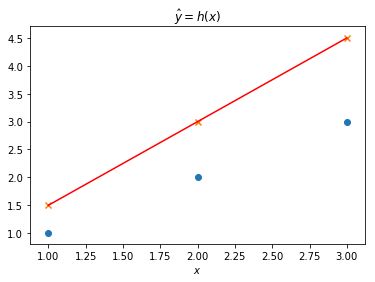

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5)
y = x
y_hat = 1.5 * x
plt.scatter(x[1:4], y[1:4])
plt.scatter(x[1:4], y_hat[1:4], marker = 'x')
plt.plot(x[1:4], y_hat[1:4], color = 'r')
plt.xlabel("$x$")
plt.title("$\hat{y} = h(x)$")
plt.show()

## 迴歸問題（6）

- 成本函數
    - 假設 $\hat{y}= h(x) = 0.5x$

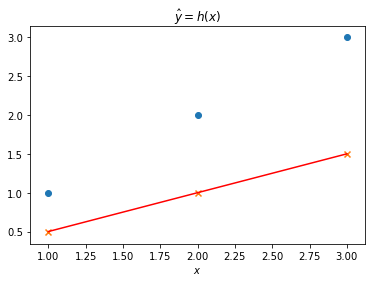

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5)
y = x
y_hat = 0.5 * x
plt.scatter(x[1:4], y[1:4])
plt.scatter(x[1:4], y_hat[1:4], marker = 'x')
plt.plot(x[1:4], y_hat[1:4], color = 'r')
plt.xlabel("$x$")
plt.title("$\hat{y} = h(x)$")
plt.show()

## 迴歸問題（7）

- 成本函數
    - 如果說我們的假設為 $h(x) = \theta_1 x$
    - 在 $0 < \theta_1 < 2$ 之間可以打點來計算成本函數 $J(\theta_1)$

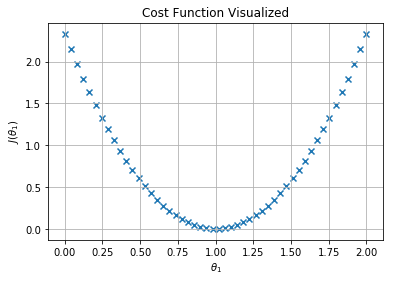

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 50)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.scatter(theta_1_arr, cost_arr, marker = 'x')
plt.grid(True)
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.title("Cost Function Visualized")
plt.show()

## 迴歸問題（8）

- 成本函數
    - 如果一個真實的函數是 $y = f(x) = 1 + x$

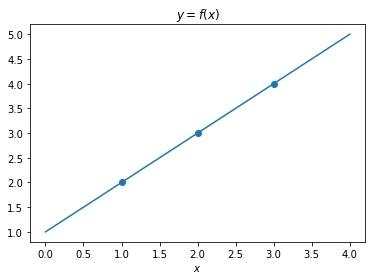

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5)
y = 1 + x
plt.scatter(x[1:4], y[1:4])
plt.plot(x, y)
plt.xlabel("$x$")
plt.title("$y = f(x)$")
plt.show()

## 迴歸問題（9）

- 成本函數
    - 如果說我們的假設為 $h(x) = \theta_0 + \theta_1 x = \theta x$
    - 在 $0 < \theta_0 < 2$ 與 $0 < \theta_1 < 2$ 之間打點來計算成本函數 $J(\theta_0, \theta_1)$
    - 改利用等高線圖視覺化成本函數

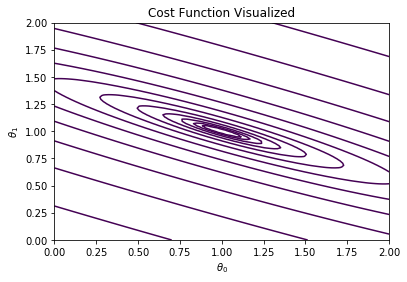

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_0, theta_1, x, y):
    return np.sum((theta_0 + theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = 1 + x
u = np.linspace(0, 2, 100)
theta_0, theta_1 = np.meshgrid(u, u)
J = np.empty(len(u) * len(u)).reshape(len(u), len(u))
for i in range(len(u)):
    for j in range(len(u)):
        J[i, j] = cost_function(theta_0[i, j], theta_1[i, j], x, y)

plt.contour(theta_0, theta_1, J, np.logspace(-3, 3, 20))
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_1$')
plt.title('Cost Function Visualized')
plt.show()

## 迴歸問題（10）

- 梯度遞減（Gradient Descent）

> 透過每個 $\theta_1$ 所得的成本函數微分取得斜率，利用這個斜率逐步取得局部最佳解的方法。

## 迴歸問題（11）

- 梯度遞減（Gradient Descent）
    - 我們先回歸最單純的假設：

$$\hat{y} = h(x) = \theta_1 x_1$$

$$\theta_1 := \theta_1 - \alpha \frac{\mathrm \partial}{\mathrm \partial \theta_1} J(\theta_1)$$

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 50)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.scatter(theta_1_arr, cost_arr, marker = 'x')
plt.plot(1.75, cost_function(1.75, x, y), marker = 'D', markersize = 12, color = 'y')
plt.plot(0.5, cost_function(0.5, x, y), marker = 'o', markersize = 12, color = 'g')
plt.plot(1, cost_function(1, x, y), marker = '^', markersize = 12, color = 'r')
plt.grid(True)
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.title("Gradient Descent")

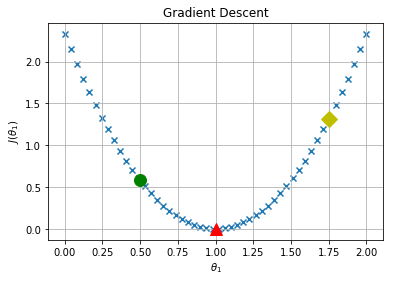

In [8]:
plt.show()

## 迴歸問題（12）

- 梯度遞減（Gradient Descent）
    - $\theta_1 = 0.5$ 的時候（綠圓點），$\frac{\mathrm \partial}{\mathrm \partial \theta_1} J(\theta_1)$ 為負值，所以 $\theta_1$ 會向右邊修正
    - $\theta_1 = 1.75$ 的時候（黃方塊），$\frac{\mathrm \partial}{\mathrm \partial \theta_1} J(\theta_1)$ 為正值，所以 $\theta_1$ 會向左邊修正
    - $\theta_1 = 1.0$ 的時候（紅三角），$\frac{\mathrm \partial}{\mathrm \partial \theta_1} J(\theta_1)$ 為零，$\theta_1$ 收斂

## 迴歸問題（13）

- 梯度遞減（Gradient Descent）
    - $\theta_1$ 修正的速度與 $\alpha$ 這個係數有關
    - $\alpha$ 稱為學習速率（Learning Rate）

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 100)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, lw = 1)
theta_1_arr = np.linspace(0.1, 1, 15)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, marker = 'o', markersize = 10, color = 'r', lw = 0)
plt.grid(True)
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.title("Optimal Gradient Descent")

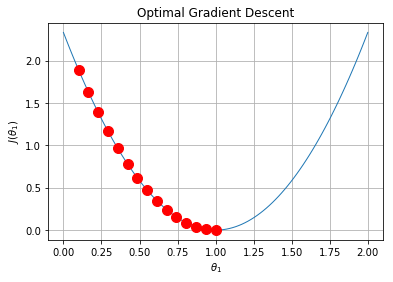

In [10]:
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 100)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, lw = 1)
theta_1_arr = np.array((0.75, 1.5, 0.25, 1.8, 0.1))
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, marker = '>', markersize = 10, color = 'r')
plt.grid(True)
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.title("$\\alpha$ is too large")

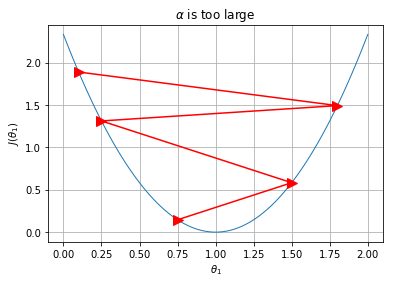

In [12]:
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_0, theta_1, x, y):
    return np.sum((theta_0 + theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = 1 + x
u = np.linspace(0, 2, 100)
theta_0, theta_1 = np.meshgrid(u, u)
J = np.empty(len(u) * len(u)).reshape(len(u), len(u))
for i in range(len(u)):
    for j in range(len(u)):
        J[i, j] = cost_function(theta_0[i, j], theta_1[i, j], x, y)

plt.contour(theta_0, theta_1, J, np.logspace(-3, 3, 20))
theta_0, theta_1 = np.linspace(1.8, 1, 5), np.linspace(1.8, 1, 5)
plt.plot(theta_0, theta_0, marker = '<', markersize = 8, color = 'r')
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_1$')
plt.title('Cost Function Visualized')

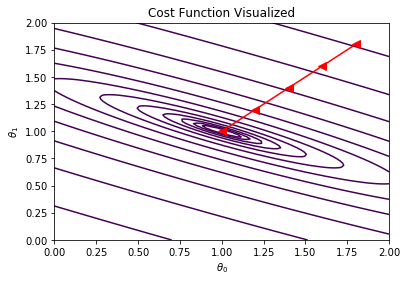

In [14]:
plt.show()

## 迴歸問題（14）

- 梯度遞減（Gradient Descent）
    - 如果學習速率夠小，成本函數每一次都會下降
    - 學習速率太小，收斂的速度太慢
    - 學習速率太大，可能會無法收斂

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 1, 100)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, lw = 1)
theta_1_arr = np.linspace(0.1, 1, 15)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, marker = '>', markersize = 10, color = 'r')
plt.xticks(theta_1_arr, [])
plt.yticks(cost_arr, [])
plt.xlabel("Number of iterations")
plt.ylabel("$J(\\theta_1)$")
plt.title("Optimal Gradient Descent")

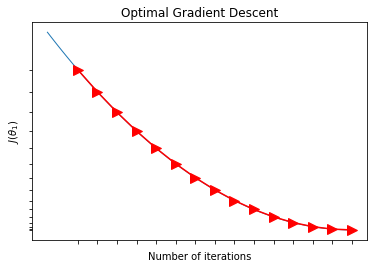

In [16]:
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 1, 100)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, lw = 1)
theta_1_arr = np.linspace(0.05, 1, 50)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, marker = '>', markersize = 6, color = 'r')
plt.xticks(theta_1_arr, [])
plt.yticks(cost_arr, [])
plt.xlabel("Number of iterations")
plt.ylabel("$J(\\theta_1)$")
plt.title("$\\alpha$ is too small")

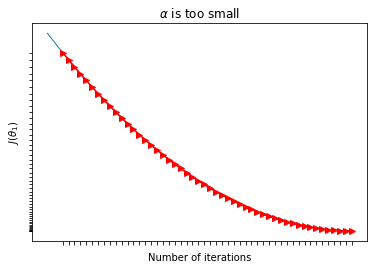

In [18]:
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta_1, x, y):
    return np.sum((theta_1 * x - y)**2)/(2*len(x))

x = np.arange(1, 4)
y = x
theta_1_arr = np.linspace(0, 2, 100)
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, lw = 1)
theta_1_arr = np.array((0.75, 1.5, 0.25, 1.8, 0.1))
cost_arr = []
for i in theta_1_arr:
    cost_arr.append(cost_function(i, x, y))
plt.plot(theta_1_arr, cost_arr, marker = '>', markersize = 10, color = 'r')
plt.grid(True)
plt.xlabel("$\\theta_1$")
plt.ylabel("$J(\\theta_1)$")
plt.title("$\\alpha$ is too large")

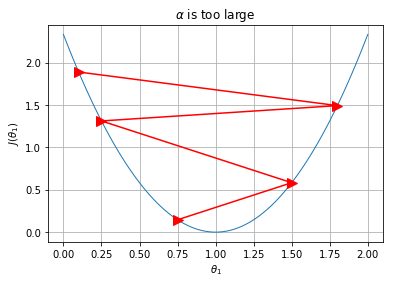

In [20]:
plt.show()

## 迴歸問題（15）

- $x_i$ 的個數增加，表示用更多的特徵（features）來建立**假設**：

$$h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$

- 假如我們令 $x_0 = 1$，就可以將式子廣義地表示為：

$$h(x) = \begin{bmatrix} \theta_0 & \theta_1 & ... & \theta_n \end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \\.\\.\\.\\ x_n \end{bmatrix} = \theta^{T}x$$

## 迴歸問題（17）

- 在梯度遞減的時候，每次迭代會同時更新所有的 $\theta_j$

$$\theta_j := \theta_j - \alpha \frac{\mathrm \partial}{\mathrm \partial \theta_j}J(\theta) \text{ }\text{ }\text{ }\text{ }for\text{ } j = 0 \text{ }...\text{ }n$$

## 迴歸問題（17）

- 在梯度遞減的時候，每次迭代會同時更新所有的 $\theta_j$

$$\theta_j := \theta_j - \alpha \frac{\mathrm \partial}{\mathrm \partial \theta_j}J(\theta) \text{ }\text{ }\text{ }\text{ }for\text{ } j = 0 \text{ }...\text{ }n$$

## 迴歸問題（18）

- 任務簡報：利用梯度遞減的方法找到一組 $(\theta_0, \theta_1, ..., \theta_n)$ 能讓 $\hat{y}$ 與 $y$ （或者說 $h$ 與 $f$）之間的差異最小

## 氣溫與冰紅茶銷量

- 利用每日最高氣溫來預測飲料店的冰紅茶銷量
- 先畫一個散佈圖

Data source: [世界第一簡單統計學](http://www.books.com.tw/products/0010695099)

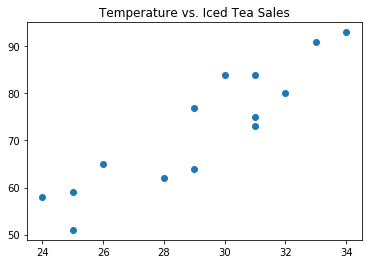

In [21]:
import matplotlib.pyplot as plt

temperature = [29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30]
iced_tea_sales = [77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84]
plt.scatter(x = temperature, y = iced_tea_sales)
plt.title("Temperature vs. Iced Tea Sales")
plt.show()

## 氣溫與冰紅茶銷量（2）

- 請 `sklearn` 幫我們找 ($\theta_0$, $\theta_1$)

In [22]:
import numpy as np
from sklearn import linear_model

temperature = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30]).reshape(-1, 1)
iced_tea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84]).reshape(-1, 1)
reg = linear_model.LinearRegression()
reg.fit(temperature, iced_tea_sales)
predictions_x = np.linspace(min(temperature), max(temperature)).reshape(-1, 1)
predictions_y = reg.predict(predictions_x)
plt.scatter(temperature, iced_tea_sales)
plt.plot(predictions_x, predictions_y, c = 'k', lw = 3)
plt.scatter(temperature, reg.predict(temperature), c = 'k', s = 80)
for i in range(len(temperature)):
    t = temperature[i].reshape(-1, 1)
    plt.plot([temperature[i], temperature[i]], [reg.predict(t), iced_tea_sales[i]], color = 'k', linewidth = 2, linestyle = "--")
t = temperature[0]
plt.plot([t, t], [reg.predict(t), iced_tea_sales[0]], color = 'k', linewidth = 2, linestyle = "--")
plt.title("$h(x)$ found by sklearn")

/Users/kuoyaojen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


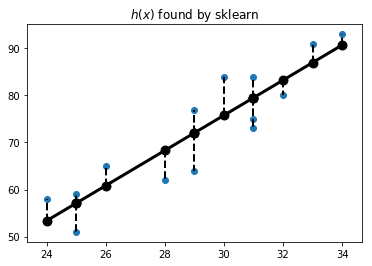

In [23]:
plt.show()

In [24]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

temperature = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30]).reshape(-1, 1)
iced_tea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(temperature, iced_tea_sales, test_size = 0.3)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print("theta_0:%.4f" % reg.intercept_)
print("theta_1:%.4f" % reg.coef_)

theta_0:-32.6242
theta_1:3.5805


## 氣溫與冰紅茶銷量（3）

評估迴歸模型的指標：

- RMSE（愈低愈好）

$$RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^N(y_i - \hat{y}_i) ^ 2}$$

- R-squared（愈接近 1 愈好）

$$R^2 = 1 - \frac{SSE}{SST} = 1 - \frac{MSE}{Var(y)}$$

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R^2: %.4f" % r2_score(y_test, y_pred))
print("RMSE: %.4f" % rmse)

R^2: 0.8565
RMSE: 4.7288


## 氣溫與冰紅茶銷量（4）

- 試試看一個有二次項的 $h(x) = \theta_0 + \theta_1x_1 + \theta_2x_1^2$

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

temperature = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30]).reshape(-1, 1)
iced_tea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(temperature, iced_tea_sales, test_size = 0.3)
lr = linear_model.LinearRegression()
pr_q = linear_model.LinearRegression()

# create quadratic terms
quadratic = PolynomialFeatures(degree = 2)
X_train_quad = quadratic.fit_transform(X_train)

# fit linear model
lr.fit(X_train, y_train)
X_fit = np.linspace(min(X_train) * 0.8, max(X_train) * 1.2, 50).reshape(-1, 1)
y_lin_fit = lr.predict(X_fit)

# fit quadratic model
pr_q.fit(X_train_quad, y_train)
y_quad_fit = pr_q.predict(quadratic.fit_transform(X_fit))

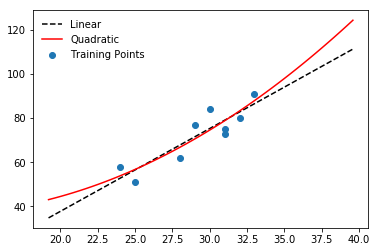

In [27]:
# plotting
plt.scatter(X_train, y_train, label = "Training Points")
plt.plot(X_fit, y_lin_fit, label = "Linear", linestyle = "--", c = "k")
plt.plot(X_fit, y_quad_fit, label = "Quadratic", c = "red")
plt.legend(loc = "upper left", frameon = False)
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error

y_lin_pred = lr.predict(X_test)
y_quad_pred = pr_q.predict(quadratic.fit_transform(X_test))
rmse_lin = np.sqrt(mean_squared_error(y_test, y_lin_pred))
rmse_quad = np.sqrt(mean_squared_error(y_test, y_quad_pred))
print("RMSE: \n Linear: %.4f \n Quadratic: %.4f" % (rmse_lin, rmse_quad))
print("\n")
r_2_lin = r2_score(y_test, y_lin_pred)
r_2_quad = r2_score(y_test, y_quad_pred)
print("R^2: \n Linear: %.4f \n Quadratic: %.4f" % (r_2_lin, r_2_quad))

RMSE: 
 Linear: 4.8503 
 Quadratic: 4.5132


R^2: 
 Linear: 0.8635 
 Quadratic: 0.8819


## 氣溫與冰紅茶銷量（5）

- 試試看一個有三次項的 $h(x) = \theta_0 + \theta_1x_1 + \theta_2x_1^2 + \theta_3x_1^3$

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

temperature = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30]).reshape(-1, 1)
iced_tea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(temperature, iced_tea_sales, test_size = 0.3)
lr = linear_model.LinearRegression()
pr_q = linear_model.LinearRegression()
pr_c = linear_model.LinearRegression()

# create quadratic terms
quadratic = PolynomialFeatures(degree = 2)
X_train_quad = quadratic.fit_transform(X_train)

# create cubic terms
cubic = PolynomialFeatures(degree = 3)
X_train_cubic = cubic.fit_transform(X_train)

# fit linear model
lr.fit(X_train, y_train)
X_fit = np.linspace(min(X_train) * 0.8, max(X_train) * 1.2, 50).reshape(-1, 1)
y_lin_fit = lr.predict(X_fit)

# fit quadratic model
pr_q.fit(X_train_quad, y_train)
y_quad_fit = pr_q.predict(quadratic.fit_transform(X_fit))

# fit quadratic model
pr_c.fit(X_train_cubic, y_train)
y_cubic_fit = pr_c.predict(cubic.fit_transform(X_fit))

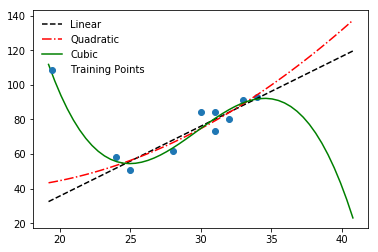

In [30]:
# plotting
plt.scatter(X_train, y_train, label = "Training Points")
plt.plot(X_fit, y_lin_fit, label = "Linear", linestyle = "--", c = "k")
plt.plot(X_fit, y_quad_fit, label = "Quadratic", c = "red", linestyle = "-.")
plt.plot(X_fit, y_cubic_fit, label = "Cubic", c = "green")
plt.legend(loc = "upper left", frameon = False)
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

y_lin_pred = lr.predict(X_test)
y_quad_pred = pr_q.predict(quadratic.fit_transform(X_test))
y_cubic_pred = pr_c.predict(cubic.fit_transform(X_test))
rmse_lin = np.sqrt(mean_squared_error(y_test, y_lin_pred))
rmse_quad = np.sqrt(mean_squared_error(y_test, y_quad_pred))
rmse_cubic = np.sqrt(mean_squared_error(y_test, y_cubic_pred))
print("RMSE: \n Linear: %.4f \n Quadratic: %.4f \n Cubic: %.4f" % (rmse_lin, rmse_quad, rmse_cubic))
print("\n")
r_2_lin = r2_score(y_test, y_lin_pred)
r_2_quad = r2_score(y_test, y_quad_pred)
r_2_cubic = r2_score(y_test, y_cubic_pred)
print("R^2: \n Linear: %.4f \n Quadratic: %.4f \n Cubic: %.4f" % (r_2_lin, r_2_quad, r_2_cubic))

RMSE: 
 Linear: 5.4838 
 Quadratic: 5.3016 
 Cubic: 6.7531


R^2: 
 Linear: 0.3629 
 Quadratic: 0.4045 
 Cubic: 0.0338


## 處理類別型變數

- 如果 $x_i$ 屬於類別型變數需要先進行轉換：
    - 有順序性（快慢、高低、冷熱...等）
    - 無順序性（性別、顏色、區域...等）

## 處理類別型變數（2）

- 有順序性（快慢、高低、冷熱...等）：使用 `pandas` 的 `map()` 方法

In [32]:
## 有順序性
import pandas as pd

df = pd.DataFrame({
    "temperature": ["Hot", "Warm", "Cold"]
})
temperature_mapping = {
    "Cold": 0,
    "Warm": 1,
    "Hot": 2
}
df["temperature_label"] = df["temperature"].map(temperature_mapping)
df

,temperature,temperature_label
0,Hot,2
1,Warm,1
2,Cold,0


## 處理類別型變數（2）

- 有順序性（快慢、高低、冷熱...等）：使用 `sklearn.preprocessing` 的 `LabelEncoder()` 類別

In [33]:
## 有順序性
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame({
    "temperature": ["Hot", "Warm", "Cold"]
})
temperature_le = LabelEncoder()
df["temperature_label"] = temperature_le.fit_transform(df["temperature"].values)
df

,temperature,temperature_label
0,Hot,1
1,Warm,2
2,Cold,0


## 處理類別型變數（3）

- 無順序性（性別、顏色、區域...等）：使用 `pandas` 的 `get_dummies()` 方法

In [34]:
## 無順序性
import pandas as pd

df = pd.DataFrame({
    "gender": ["Female", "Male", "Female"]
})
gender_label = pd.get_dummies(df["gender"])
gender_label

,Female,Male
0,1,0
1,0,1
2,1,0


## 正規化

- Bias vs. Variance
- Under-fitting vs. Over-fitting

In [35]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0]).reshape(-1, 1)
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8]).reshape(-1, 1)

# Fitting
lr = linear_model.LinearRegression()
pr_q = linear_model.LinearRegression()
pr_6 = linear_model.LinearRegression()
quadratic = PolynomialFeatures(degree = 2)
power_of_6 = PolynomialFeatures(degree = 6)
X_quad = quadratic.fit_transform(X)
X_p6 = power_of_6.fit_transform(X)
lr.fit(X, y)
X_fit = np.linspace(250, 600, 100).reshape(-1, 1)
y_lin_fit = lr.predict(X_fit)
pr_q.fit(X_quad, y)
y_quad_fit = pr_q.predict(quadratic.fit_transform(X_fit))
pr_6.fit(X_p6, y)
y_p6_fit = pr_6.predict(power_of_6.fit_transform(X_fit))

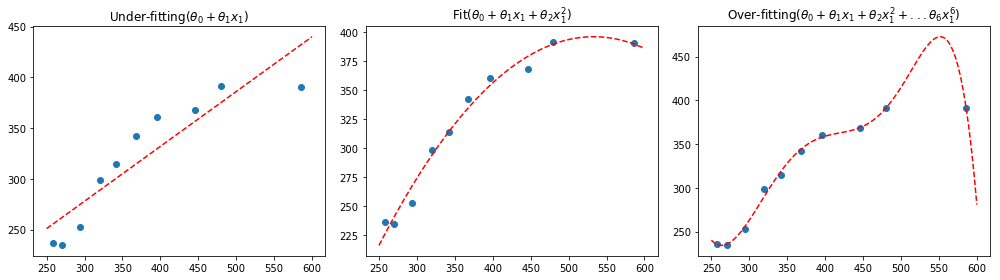

In [36]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize = (14, 4))
plt.subplot(1, 3, 1)
plt.scatter(X, y)
plt.plot(X_fit, y_lin_fit, linestyle = "--", c = "r")
plt.title("Under-fitting($\\theta_0 + \\theta_1x_1$)")
plt.subplot(1, 3, 2)
plt.scatter(X, y)
plt.plot(X_fit, y_quad_fit, linestyle = "--", c = "r")
plt.title("Fit($\\theta_0 + \\theta_1x_1 + \\theta_2x_1^2$)")
plt.subplot(1, 3, 3)
plt.scatter(X, y)
plt.plot(X_fit, y_p6_fit, linestyle = "--", c = "r")
plt.title("Over-fitting($\\theta_0 + \\theta_1x_1 + \\theta_2x_1^2 + ... \\theta_6x_1^6$)")
plt.tight_layout()
plt.show()

## 正規化（2）

- 如何防止迴歸模型過度配適：
    - Ridge Regression
    - LASSO
    - Elastic Net

$$J(\theta)_{Ridge} = \sum_{i=1}^{m}(\hat{y_i}-y_i)^2 + \alpha \theta^2$$
$$J(\theta)_{LASSO} = \sum_{i=1}^{m}(\hat{y_i}-y_i)^2 + \alpha | \theta |$$
$$J(\theta)_{ElasticNet} = \sum_{i=1}^{m}(\hat{y_i}-y_i)^2 + + \alpha \theta^2 + \alpha | \theta |$$

## 正規化（3）

- 如何防止迴歸模型過度配適：
    - Ridge Regression

```python
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1.0)
```

## 正規化（4）

- 如何防止迴歸模型過度配適：
    - LASSO

```python
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1.0)
```

## 正規化（5）

- 如何防止迴歸模型過度配適：
    - Elastic Net

```python
from sklearn.linear_model import ElasticNet
ElasticNet = ElasticNet(alpha = 1.0, l1_ratio = 0.5)
```

## 參考連結

- [Machine Learning Foundations (機器學習基石)](https://www.youtube.com/playlist?list=PLXVfgk9fNX2I7tB6oIINGBmW50rrmFTqf)
- [Machine Learning Techniques (機器學習技法)](https://www.youtube.com/playlist?list=PLXVfgk9fNX2IQOYPmqjqWsNUFl2kpk1U2)
- [Coursera Machine Learning](https://www.coursera.org/learn/machine-learning/home/welcome)